# Task 4

#### Import TensorFlow

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import cv2
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

#### Define Methods

In [2]:
def evaluate(testSet, testLabels, testModel):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = testModel.evaluate(testSet, testLabels, verbose=2) 
    print("ACCURACY: " + str(test_acc))   
    
def displaySamplesFromDataSet(xDataSet, yDataset):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
         ax = axes[i//num_col, i%num_col]
         ax.imshow(images[i].squeeze(), cmap='gray_r')
         ax.set_title('Label: {}'.format(labels[i]))
    plt.tight_layout()
    plt.show()
    
def displayAndPreditSamplesFromDataSet(xDataSet, yDataset, model):
    # define number of images to show
    num_row = 2
    num_col = 8
    num= num_row*num_col
    
    # get images
    images = xDataSet[0:num]
    labels = yDataset[0:num]
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        image = images[i]
        image = image.reshape(-1, 28, 28, 1)
        
        prediction = model.predict(image)
        classID = np.argmax(prediction)
        #print(prediction[0:])
        
        ax = axes[i//num_col, i%num_col]
        ax.imshow(image.squeeze(), cmap='gray_r')
        
        ax.set_title('L: {} P:{}'.format(labels[i], classID))
    plt.tight_layout()
    plt.show()

#### Load MNIST Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255

### Training

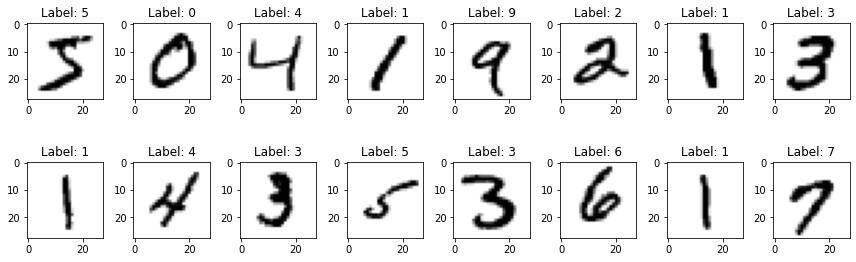

In [4]:
displaySamplesFromDataSet(train_images, train_labels)
train_images = train_images.reshape(-1, 28, 28, 1)

### Test

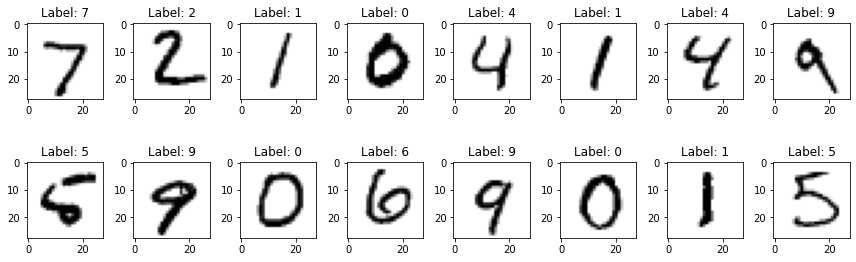

In [5]:
displaySamplesFromDataSet(test_images, test_labels)

#### Flip Image

In [6]:
def flip_image(images):
  flipped_images = []

  for img in images:
    flipped_images.append(cv2.flip(img, 0))
  return flipped_images

In [7]:
test_flipped_images = flip_image(test_images)
test_flipped_images = np.array(test_flipped_images, dtype=np.float32) / 255
test_flipped_labels = np.array(test_labels, dtype=np.float32) / 255

test_flipped_images = test_flipped_images.reshape(-1, 28, 28, 1)

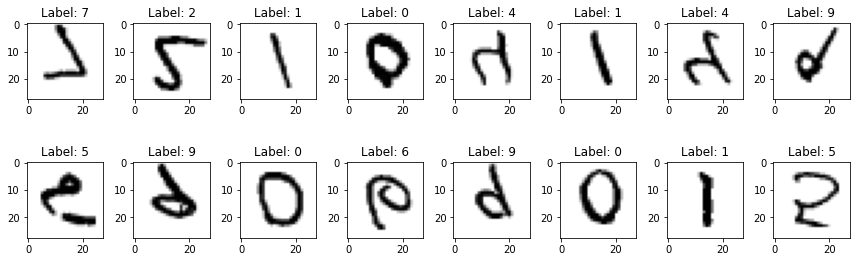

In [8]:
displaySamplesFromDataSet(test_flipped_images, test_labels)

#### Build and Train Model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_flipped_images, test_labels),batch_size=16)

Epoch 1/5
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1248 - accuracy: 0.9619 - val_loss: 5.0852 - val_accuracy: 0.3674
Epoch 2/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 5.4308 - val_accuracy: 0.3853
Epoch 3/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 6.2337 - val_accuracy: 0.3976
Epoch 4/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 5.7293 - val_accuracy: 0.4218
Epoch 5/5
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 6.2317 - val_accuracy: 0.3916


313/313 - 1s - loss: 6.2317 - accuracy: 0.3916
ACCURACY: 0.39160001277923584


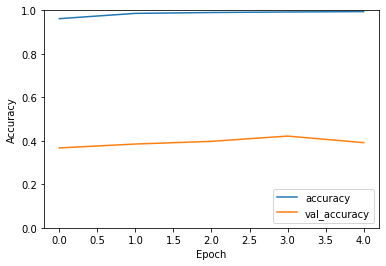

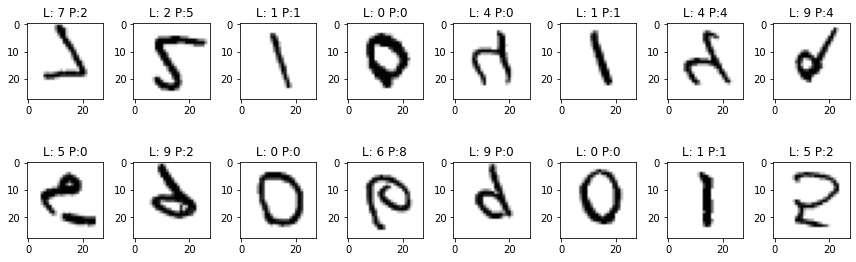

In [11]:
evaluate(test_flipped_images, test_labels, model)
displayAndPreditSamplesFromDataSet(test_flipped_images, test_labels, model)
#displayAndPreditSamplesFromDataSet(train_images, train_labels, model)